# **Tugas Praktikum 1**

In [ ]:
# Load data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


- Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

- Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

- Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [ ]:
df = data.copy()

print("DataFrame Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

print("\nLabel Value Counts:")
print(df['label'].value_counts())

# Create a dictionary for encoding labels
new_labels = {
    'male': 1,
    'female': 0
}

# Encode the 'label' column
df['label'] = df['label'].map(new_labels)

print("\nDataFrame after Label Encoding:")
print(df.head())

# Separate features (X) and label (y)
X = df.drop('label', axis=1)
y = df['label']

print("\nX (features) shape:", X.shape)
print("y (labels) shape:", y.shape)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (70% train, 30% test) with a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (2217, 20)
X_test_scaled shape: (951, 20)
y_train shape: (2217,)
y_test shape: (951,)


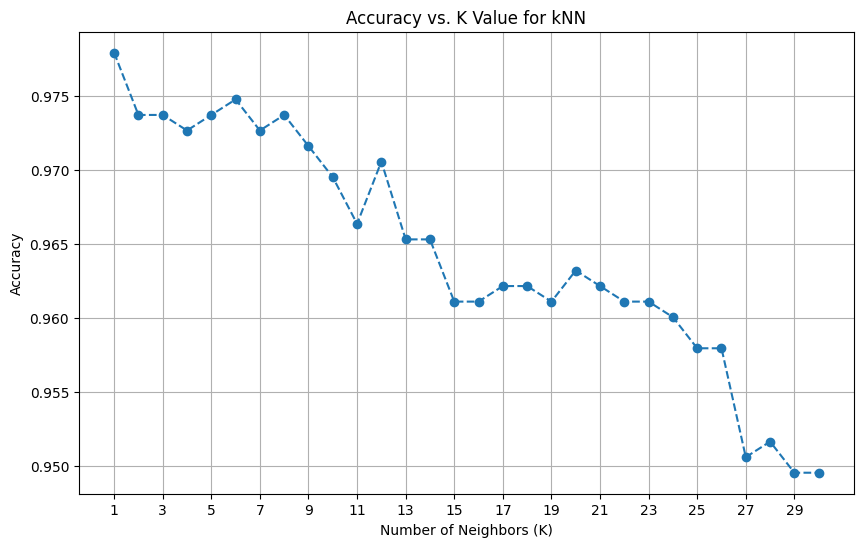

The optimal k value is: 1 with accuracy: 0.9779


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List to store accuracy for each k
accuracies = []

# Try k from 1 to 30
max_k = 30
for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), accuracies, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value for kNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, max_k + 1, 2))
plt.grid(True)
plt.show()

# Find the optimal k value
optimal_k = accuracies.index(max(accuracies)) + 1
print(f"The optimal k value is: {optimal_k} with accuracy: {max(accuracies):.4f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the final kNN model with the optimal k
optimal_k = 1 # From the previous step output
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_final = knn_final.predict(X_test_scaled)

# Evaluate the model
print(f"Final Model Accuracy with k={optimal_k}: {accuracy_score(y_test, y_pred_final):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Final Model Accuracy with k=1: 0.9779

Confusion Matrix:
 [[465  11]
 [ 10 465]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       476
           1       0.98      0.98      0.98       475

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



Nilai k terbaik untuk model KNN adalah 1, karena menghasilkan akurasi tertinggi yaitu sekitar 97.8%. Model kNN dengan k=1 mencapai akurasi mencapai 0.9779 pada data uji, menunjukkan kemampuan klasifikasi yang sangat baik. Ada juga fitur yang digunakan model menggunakan 20 fitur akustik dari dataset voice.csv, seperti meanfreq, IQR, meanfun, maxfun, dan lainnya. Semua fitur ini relevan karena merepresentasikan karakteristik suara yang membedakan antara pria dan wanita. Berdasarkan grafik hubungan antara nilai k dan akurasi, k=1 memberikan hasil terbaik. Hal ini menunjukkan bahwa data suara pria dan wanita sangat terpisah jelas, sehingga satu tetangga terdekat sudah cukup akurat untuk klasifikasi.